In [1]:
from hossam import load_data
from scipy.stats import t, ttest_1samp, normaltest
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from math import sqrt
import numpy as np

In [2]:
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

In [4]:
origin=load_data('dog_temperature')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print('데이터 타입 정보 :')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab10/dog_temperature.xlsx
[desc] 강아지 25마리의 체온을 측정한 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기 : (25, 1)
행 개수 : 25개
열 개수 : 1개

===== 타입 확인 =====
데이터 타입 정보 :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   체온      25 non-null     float64
dtypes: float64(1)
memory usage: 332.0 bytes
None


,체온
0,25.8
1,24.6
2,26.1
3,22.9
4,25.1


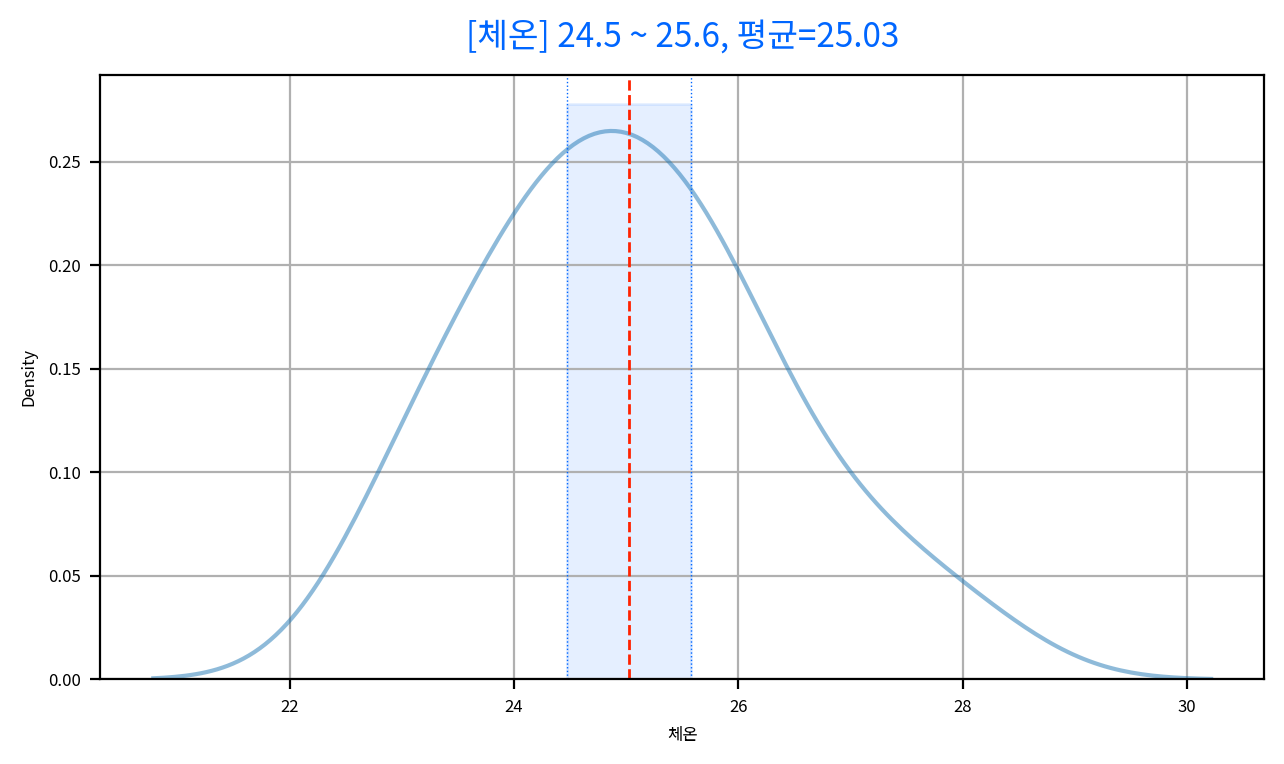

In [5]:
clevel=0.95
data=origin['체온']
n=len(data)
dof=n-1
sample_mean=data.mean()
sample_std=data.std()
sample_std_error=sample_std/sqrt(n)
cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)


sb.kdeplot(data=data, fill=False, alpha=0.5)

ax.axvline(cmin, linestyle=':', color='#0066ff', linewidth=0.5)
ax.axvline(cmax, linestyle=':', color='#0066ff', linewidth=0.5)

ymin, ymax=ax.get_ylim()
ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1, color='#0066ff88')

ax.axvline(sample_mean, linestyle='--', color='#ff2200', linewidth=1)

ax.grid(True)
ax.set_title(f'[{data.name}] {cmin:.1f} ~ {cmax:.1f}, 평균={sample_mean:0.2f}', color='#0066ff', fontsize=12, fontweight=1000, pad=10)


plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

In [7]:
s, p=normaltest(origin['체온'])
'statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}'.format(s,p,p>0.05)

'statistic: 0.819, p-value: 0.664, 정규성 충족 여부: True'

In [10]:
s, p=ttest_1samp(origin['체온'], 24.3)
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s,p,'대립' if p<=0.05 else '귀무')

'statistic: 2.713, p-value: 0.012, 대립가설 채택'

In [11]:
s, p=ttest_1samp(origin['체온'], 24.3, alternative='less')
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s,p,'대립' if p<=0.05 else '귀무')

'statistic: 2.713, p-value: 0.994, 귀무가설 채택'

In [12]:
s, p=ttest_1samp(origin['체온'], 24.3, alternative='greater')
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s,p,'대립' if p<=0.05 else '귀무')

'statistic: 2.713, p-value: 0.006, 대립가설 채택'

In [13]:
origin=load_data('insur')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab10/insur.xlsx
[desc] 어느 보험회사에서 한해 동안 모집한 가입원들에 대한 가입 정보 (출처: 방송통신대학교 통계학개론)

field     description
--------  ------------------------------------------------------
직업      1=육체노동, 2=정신노동(직상인), 3=자영업
교육수준  1=초등학교 이하, 2=중졸 및 고졸, 3=대졸, 4=대학원 졸업
성별      1=남자, 2=여자
나이      숫자
가입금액  단위=천만원
월수입    단위=만원


===== 데이터 크기 확인 =====
데이터셋 크기 : (30, 6)
행 개수 : 30개
열 개수 : 6개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   직업      30 non-null     int64  
 1   교육수준    30 non-null     int64  
 2   성별      30 non-null     int64  
 3   나이      30 non-null     int64  
 4   가입금액    30 non-null     float64
 5   월수입     30 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 1.5 KB
None


,직업,교육수준,성별,나이,가입금액,월수입
0,1,2,1,35,15.0,100
1,2,3,1,40,10.0,150
2,2,3,2,36,8.0,120
3,3,4,2,38,12.0,140
4,1,1,1,45,10.0,150


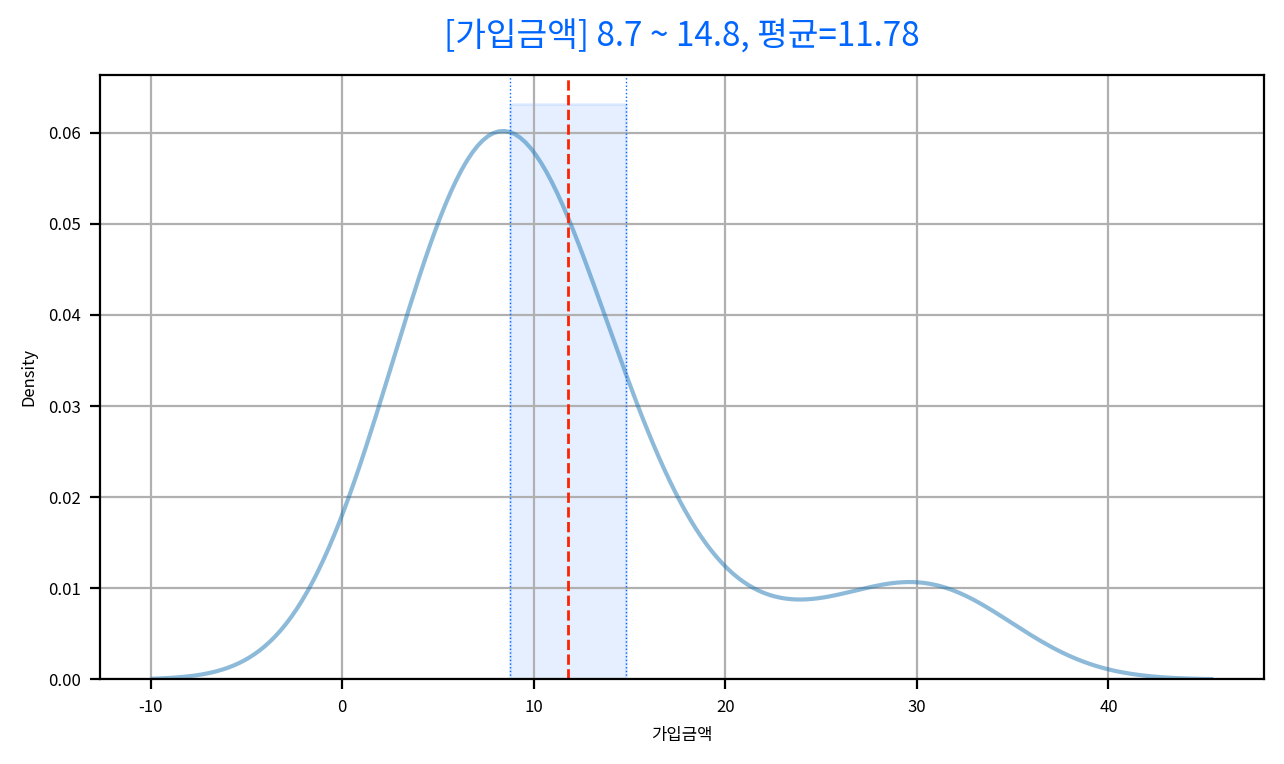

In [14]:
clevel=0.95
data=origin['가입금액']
n=len(data)
dof=n-1
sample_mean=data.mean()
sample_std=data.std()
sample_std_error=sample_std/sqrt(n)
cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)


sb.kdeplot(data=data, fill=False, alpha=0.5)

ax.axvline(cmin, linestyle=':', color='#0066ff', linewidth=0.5)
ax.axvline(cmax, linestyle=':', color='#0066ff', linewidth=0.5)

ymin, ymax=ax.get_ylim()
ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1, color='#0066ff88')

ax.axvline(sample_mean, linestyle='--', color='#ff2200', linewidth=1)

ax.grid(True)
ax.set_title(f'[{data.name}] {cmin:.1f} ~ {cmax:.1f}, 평균={sample_mean:0.2f}', color='#0066ff', fontsize=12, fontweight=1000, pad=10)


plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

In [15]:
s, p=normaltest(origin['가입금액'])
'statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}'.format(s,p,p>0.05)

'statistic: 11.438, p-value: 0.003, 정규성 충족 여부: False'

In [16]:
log_data=np.log(origin['가입금액'])
log_data

0     2.708050
1     2.302585
2     2.079442
3     2.484907
4     2.302585
5     0.916291
6     2.197225
7     2.014903
8     1.704748
9     3.218876
10    2.351375
11    1.252763
12    2.272126
13    2.525729
14    3.401197
15    2.397895
16    2.174752
17    1.504077
18    2.054124
19    1.902108
20    1.945910
21    3.496508
22    2.708050
23    2.995732
24    1.386294
25    1.609438
26    2.708050
27    3.401197
28    1.609438
29    2.302585
Name: 가입금액, dtype: float64

In [17]:
target_value=np.log(10)
target_value

np.float64(2.302585092994046)

In [18]:
s, p=normaltest(log_data)
'statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}'.format(s,p,p>0.05)

'statistic: 0.104, p-value: 0.950, 정규성 충족 여부: True'

In [19]:
s, p=ttest_1samp(log_data, target_value)
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s,p,'대립' if p<=0.05 else '귀무')

'statistic: -0.326, p-value: 0.747, 귀무가설 채택'

In [20]:
s, p=ttest_1samp(log_data, target_value, alternative='less')
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s,p,'대립' if p<=0.05 else '귀무')

'statistic: -0.326, p-value: 0.374, 귀무가설 채택'

In [21]:
s, p=ttest_1samp(log_data, target_value, alternative='greater')
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s,p,'대립' if p<=0.05 else '귀무')

'statistic: -0.326, p-value: 0.626, 귀무가설 채택'